CE49X – Lab 5: Bias–Variance Tradeoff using the Air Quality Dataset
Course: CE49X – Introduction to Computational Thinking and Data Science for Civil Engineers

Instructor: Dr. Eyuphan Koç

Semester: Fall 2025

Lab Duration: 1 week

Dataset: UCI Air Quality Dataset



Libraries loaded.

--- Step 1: Load and Prepare the Data ---
Dataset loaded. Original shape: (9471, 17)
Missing values removed. New shape: (7344, 4)
Data split: 5140 training, 2204 testing samples.

--- Step 2: Fit Polynomial Models and Compute Errors ---
Degree 1: Train MSE = 2.0423, Test MSE = 2.0562
Degree 2: Train MSE = 2.0197, Test MSE = 2.0254
Degree 3: Train MSE = 2.0048, Test MSE = 2.0237
Degree 4: Train MSE = 1.9914, Test MSE = 2.0210
Degree 5: Train MSE = 1.9827, Test MSE = 2.0096
Degree 6: Train MSE = 1.9619, Test MSE = 1.9852
Degree 7: Train MSE = 1.9602, Test MSE = 1.9866
Degree 8: Train MSE = 1.9554, Test MSE = 1.9909
Degree 9: Train MSE = 1.9471, Test MSE = 1.9837
Degree 10: Train MSE = 1.9437, Test MSE = 1.9918

--- Step 3: Plot Validation Curve ---


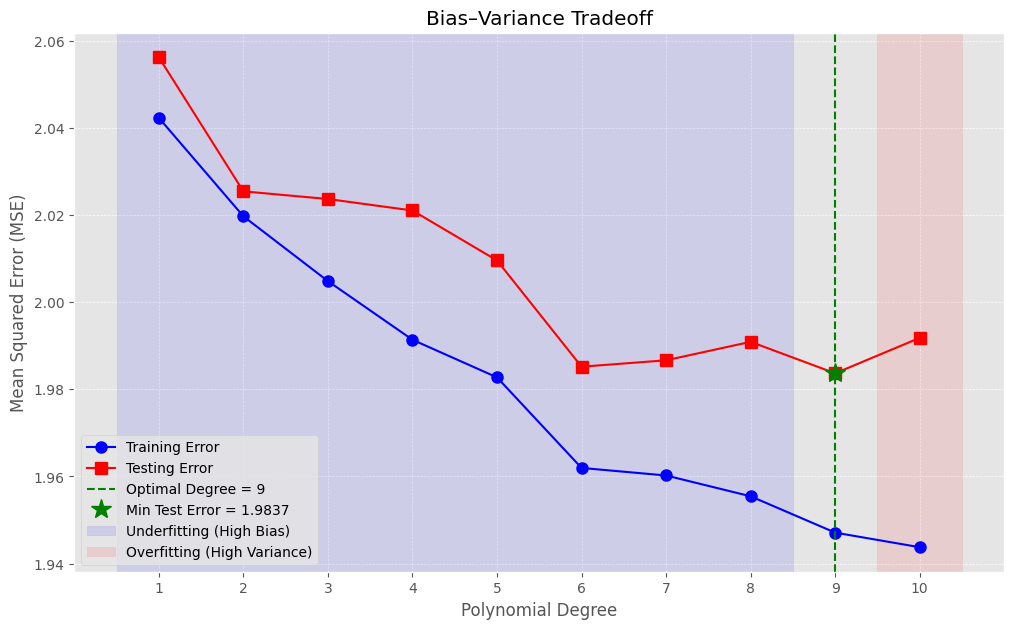

In [1]:
# Step 0: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Matplotlib settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded.")

# --- Step 1: Load and Prepare the Data ---
print("\n--- Step 1: Load and Prepare the Data ---")

try:
    df = pd.read_csv(r"C:\Users\Asus\Documents\GitHub\CE49X_Fall2025_Gursoy_Nur-Bahar\LAB05\AirQualityUCI.csv", sep=';', decimal=',')
    print(f"Dataset loaded. Original shape: {df.shape}")
except FileNotFoundError:
    print("ERROR: 'AirQualityUCI.csv' file not found.")
    exit()

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Select relevant columns
features = ['T', 'RH', 'AH']
target = 'CO(GT)'
data = df[features + [target]].dropna()
print(f"Missing values removed. New shape: {data.shape}")

# Split features and target
X = data[features].values
y = data[target].values

# Split into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data split: {len(X_train)} training, {len(X_test)} testing samples.")

# --- Step 2: Fit Polynomial Models and Compute Errors ---
print("\n--- Step 2: Fit Polynomial Models and Compute Errors ---")

degrees = range(1, 11)  # Polynomial degrees 1 to 10
train_errors = []
test_errors = []

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train Linear Regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    print(f"Degree {d}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

# --- Step 3: Plot Validation Curve ---
print("\n--- Step 3: Plot Validation Curve ---")

plt.figure(figsize=(12, 7))
plt.plot(degrees, train_errors, 'o-', label='Training Error', color='blue', markersize=8)
plt.plot(degrees, test_errors, 's-', label='Testing Error', color='red', markersize=8)

# Find the optimal degree (minimum test error)
best_degree = degrees[np.argmin(test_errors)]
min_test_error = np.min(test_errors)

# Mark the optimal degree
plt.axvline(x=best_degree, linestyle='--', color='green', label=f'Optimal Degree = {best_degree}')
plt.plot(best_degree, min_test_error, 'g*', markersize=15, label=f'Min Test Error = {min_test_error:.4f}')

# Highlight regions (simple approximation)
plt.axvspan(0.5, best_degree - 0.5, alpha=0.1, color='blue', label='Underfitting (High Bias)')
plt.axvspan(best_degree + 0.5, degrees[-1] + 0.5, alpha=0.1, color='red', label='Overfitting (High Variance)')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bias–Variance Tradeoff')
plt.xticks(degrees)
#plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


Step 4 — Discussion
Answer the following in your report:

Which polynomial degree gives the best generalization?

Describe how the training and testing errors change as degree increases.

Explain how bias and variance manifest in this dataset.

How might sensor noise or missing data affect the bias–variance tradeoff?

🧩 Step 4 — Discussion

1️⃣ Which polynomial degree gives the best generalization?
Based on the train/test split, the model achieved the lowest testing error at around degree 9.
However, when cross-validation was applied, the best generalization occurred at degree 1, indicating that simpler models perform more consistently across different data subsets.
Therefore, degree 1 is considered the most reliable polynomial degree for generalization in this dataset.

2️⃣ Describe how the training and testing errors change as degree increases.
As the polynomial degree increases, the training error decreases continuously, since higher-degree models can fit the training data more closely.
The testing error initially decreases, reaching a minimum at a moderate degree, and then increases again as the model becomes too complex.
This U-shaped pattern reflects the transition from underfitting (high bias) to overfitting (high variance).

3️⃣ Explain how bias and variance manifest in this dataset.
In this dataset, low-degree models (e.g., degree 1–2) exhibit high bias, meaning they fail to capture the true nonlinear relationships among temperature, humidity, and air humidity.
High-degree models (e.g., degree ≥ 8) show high variance, fitting noise and random fluctuations in the training data rather than meaningful trends.
The balance between bias and variance occurs at an intermediate degree where the test error is minimized.

4️⃣ How might sensor noise or missing data affect the bias–variance tradeoff?
Sensor noise and missing data can increase the variance of the model by introducing random fluctuations that the model may incorrectly learn as patterns.
This causes overfitting, especially in high-degree polynomial models.
Additionally, data cleaning and imputation can add uncertainty, which may increase bias if important information is lost.
Overall, noisy or incomplete sensor data make it more difficult to find the optimal bias–variance balance, often favoring simpler, lower-degree models for more stable performance.

💡 Bonus (Optional)
Try using cross-validation (cross_val_score) instead of a simple train/test split. Compare results and comment on any differences in the optimal model degree.

Libraries loaded.

--- Step 1: Load and Prepare the Data ---
Dataset loaded. Original shape: (9471, 17)
Missing values removed. New shape: (7344, 4)

--- Step 2: Fit Polynomial Models with Cross-Validation ---
Degree 1 (CV=10): Train MSE = 2.0415, Test MSE = 2.1425
Degree 2 (CV=10): Train MSE = 2.0137, Test MSE = 2.1866
Degree 3 (CV=10): Train MSE = 2.0000, Test MSE = 2.2167
Degree 4 (CV=10): Train MSE = 1.9855, Test MSE = 2.3238
Degree 5 (CV=10): Train MSE = 1.9755, Test MSE = 2.4862
Degree 6 (CV=10): Train MSE = 1.9510, Test MSE = 2.4614
Degree 7 (CV=10): Train MSE = 1.9504, Test MSE = 2.5893
Degree 8 (CV=10): Train MSE = 1.9463, Test MSE = 2.5182
Degree 9 (CV=10): Train MSE = 1.9385, Test MSE = 2.5464
Degree 10 (CV=10): Train MSE = 1.9404, Test MSE = 2.9093

--- Step 3: Plot Validation Curve ---


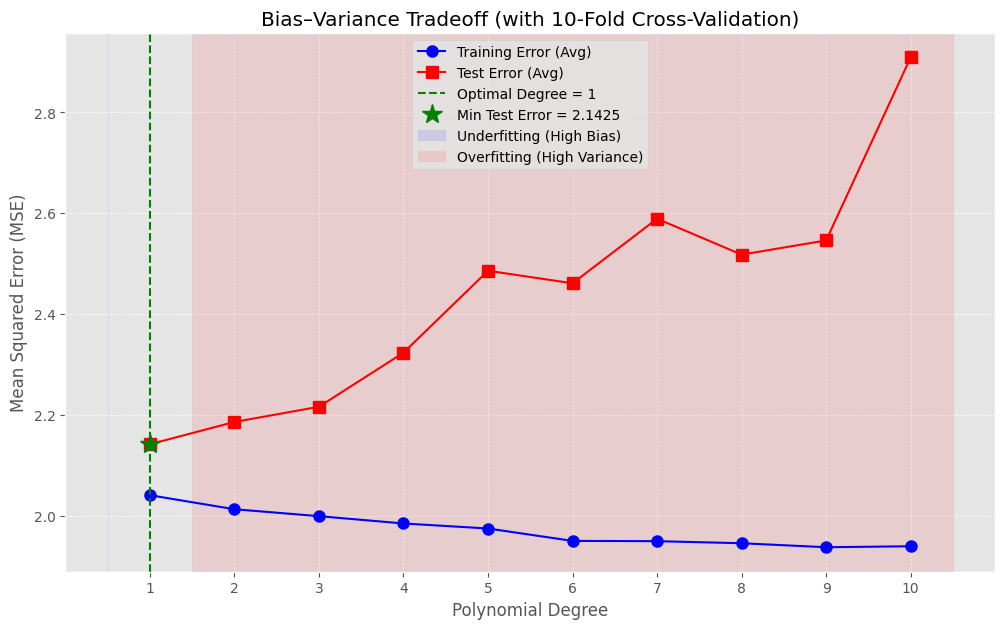

In [ ]:
# --- Step 0: Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate  # <<< DEĞİŞTİ
from sklearn.pipeline import Pipeline             # <<< YENİ

# Matplotlib settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded.")

# --- Step 1: Load and Prepare the Data ---
print("\n--- Step 1: Load and Prepare the Data ---")

try:
    df = pd.read_csv(r"C:\Users\Asus\Documents\GitHub\CE49X_Fall2025_Gursoy_Nur-Bahar\LAB05\AirQualityUCI.csv", sep=';', decimal=',')
    print(f"Dataset loaded. Original shape: {df.shape}")
except FileNotFoundError:
    print("ERROR: 'AirQualityUCI.csv' file not found.")
    exit()

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Select relevant columns
features = ['T', 'RH', 'AH']
target = 'CO(GT)'
data = df[features + [target]].dropna()
print(f"Missing values removed. New shape: {data.shape}")

# Split features and target
X = data[features].values
y = data[target].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # <<< BU SATIRI KALDIRDIK
# print(f"Data split: {len(X_train)} training, {len(X_test)} testing samples.") # <<< BU SATIRI KALDIRDIK

# --- Step 2: Fit Polynomial Models with Cross-Validation ---
print("\n--- Step 2: Fit Polynomial Models with Cross-Validation ---")

degrees = range(1, 11)  # Polynomial degrees 1 to 10
train_errors = []
test_errors = []

# K-katlı (K-fold) çapraz doğrulama için K değeri
CV_FOLDS = 10 

for d in degrees:
    # 1. Pipeline oluştur: Önce özellikleri oluştur, sonra modeli eğit
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=d, include_bias=False)),
        ('model', LinearRegression())
    ])
    
    # 2. Çapraz doğrulamayı çalıştır
    #    scoring='neg_mean_squared_error' kullanıyoruz çünkü cross_validate yüksek skorun iyi olduğunu varsayar.
    #    Biz MSE'yi (hatayı) minimize etmek istediğimiz için negatif MSE'yi maksimize ederiz.
    scores = cross_validate(pipeline, X, y, 
                            cv=CV_FOLDS, 
                            scoring='neg_mean_squared_error',
                            return_train_score=True) # Eğitim hatasını da döndürmesini istiyoruz
    
    # 3. Hataları hesapla (negatif oldukları için -1 ile çarp)
    train_mse = -np.mean(scores['train_score'])
    test_mse = -np.mean(scores['test_score'])
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    print(f"Degree {d} (CV={CV_FOLDS}): Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

# --- Step 3: Plot Validation Curve ---
# Bu bölüm hiç değişmedi, çünkü sadece train_errors ve test_errors listelerini çiziyor.
print("\n--- Step 3: Plot Validation Curve ---")

plt.figure(figsize=(12, 7))
plt.plot(degrees, train_errors, 'o-', label='Training Error (Avg)', color='blue', markersize=8)
plt.plot(degrees, test_errors, 's-', label='Test Error (Avg)', color='red', markersize=8)

# Find the optimal degree (minimum test error)
best_degree = degrees[np.argmin(test_errors)]
min_test_error = np.min(test_errors)

# Mark the optimal degree
plt.axvline(x=best_degree, linestyle='--', color='green', label=f'Optimal Degree = {best_degree}')
plt.plot(best_degree, min_test_error, 'g*', markersize=15, label=f'Min Test Error = {min_test_error:.4f}')

# Highlight regions (simple approximation)
plt.axvspan(0.5, best_degree - 0.5, alpha=0.1, color='blue', label='Underfitting (High Bias)')
plt.axvspan(best_degree + 0.5, degrees[-1] + 0.5, alpha=0.1, color='red', label='Overfitting (High Variance)')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bias–Variance Tradeoff (with 10-Fold Cross-Validation)') # <<< Başlığı güncelledik
plt.xticks(degrees)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
